In [81]:
import json
import pandas as pd
from dataclasses import dataclass
from typing import List
import matplotlib.pyplot as plt

@dataclass
class Trade:
    timestamp: int
    buyer: str
    seller: str
    symbol: str
    currency: str
    price: float
    quantity: int

# Read entire log file
with open('./submission.log', 'r') as f:
    content = f.read()

# --- Parse Sandbox Logs ---
sandbox_start = content.find('Sandbox logs:')
activities_start = content.find('Activities log:')
sandbox_section = content[sandbox_start + len('Sandbox logs:'):activities_start].strip()

# Each JSON object is on a new line; wrap in array brackets
# sandbox_json = '[' + ','.join(sandbox_section.split('\n')) + ']'

# sandbox_logs = json.loads(sandbox_json)

# --- Parse Activities Log ---
trades_start = content.find('Trade History:')
activities_section = content[activities_start + len('Activities log:'):trades_start].strip()

# Read CSV section into a DataFrame
from io import StringIO
activities_df = pd.read_csv(StringIO(activities_section), sep=';')

# --- Parse Trades ---
trades_section = content[trades_start + len('Trade History:'):].strip()
trades_data = json.loads(trades_section)

# Convert to Trade objects
trades: List[Trade] = [Trade(**t) for t in trades_data]

In [82]:
our_trades = [trade for trade in trades if trade.buyer == "SUBMISSION" or trade.seller == "SUBMISSION"]
# Convert to DataFrame
trades_df = pd.DataFrame([trade.__dict__ for trade in our_trades])
trades_df


,timestamp,buyer,seller,symbol,currency,price,quantity
0,4400,SUBMISSION,Camilla,MAGNIFICENT_MACARONS,SEASHELLS,777,25
1,5500,Camilla,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,773,25
2,8700,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,777,6
3,12700,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,761,5
4,15600,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,757,6
5,15900,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,755,6
6,18700,Camilla,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,777,25
7,21600,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,765,7
8,25400,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,795,7
9,30500,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,755,5


In [83]:
buy_orders = trades_df[trades_df['buyer'] == 'SUBMISSION']
sell_orders = trades_df[trades_df['seller'] == 'SUBMISSION']

buy_orders.


# total_buys = buy_orders['quantity'].sum()
# total_sells = sell_orders['quantity'].sum()

# total_spent = (buy_orders['price'] * buy_orders['quantity']).sum()
# total_made = (sell_orders['price'] * sell_orders['quantity']).sum()

# cost_basis = int(total_made - total_spent)


# print(cost_basis)


,timestamp,buyer,seller,symbol,currency,price,quantity
0,4400,SUBMISSION,Camilla,MAGNIFICENT_MACARONS,SEASHELLS,777,25
3,12700,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,761,5
4,15600,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,757,6
5,15900,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,755,6
7,21600,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,765,7
10,32000,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,761,5
11,35100,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,749,6
12,39900,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,724,4
13,40700,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,730,4
15,41200,SUBMISSION,Paris,MAGNIFICENT_MACARONS,SEASHELLS,733,5


In [84]:
# plot total position over time

position = []
prices = []
for i in range(len(trades_df)):
    print(i)
    if i == 0:
        position.append(0 + trades_df['quantity'][i])
        prices.append(trades_df['price'][i])
        continue

    if trades_df['buyer'][i] == 'SUBMISSION':
        position.append(position[-1] + trades_df['quantity'][i])
        prices.append(trades_df['price'][i])
    else:
        position.append(position[-1] - trades_df['quantity'][i])
        prices.append(trades_df['price'][i])


final_position = position[-1]
print(f"Final Position: {final_position}")
# get price of last trade
final_price = prices[-1]
final_price = 718
print(f"Final Price: {final_price}")


final_pnl = cost_basis + final_position * final_price
print(f"Final PNL: {final_pnl}")




Final Position: -21
Final Price: 718
Final PNL: -21834


In [85]:
sell_orders

,timestamp,buyer,seller,symbol,currency,price,quantity
1,5500,Camilla,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,773,25
2,8700,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,777,6
6,18700,Camilla,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,777,25
8,25400,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,795,7
9,30500,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,755,5
14,40900,Camilla,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,731,25
17,48300,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,721,7
20,64800,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,735,4
21,65400,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,740,7
22,74200,Paris,SUBMISSION,MAGNIFICENT_MACARONS,SEASHELLS,734,5


Total Payed Out: [19425, 23230, 27772, 32302, 37657, 41462, 45956, 48852, 51772, 55437, 59763, 77638, 82643, 87550, 92667, 97707, 102649]
Total Received: [19325, 23987, 43412, 48977, 52752, 71027, 76074, 79014, 84194, 87864, 105314, 110291, 114569, 118901]
Final Position: -21
Final PNL: 1174
Position: [25, 0, -6, -1, 5, 11, -14, -7, -14, -19, -14, -8, -4, 0, -25, -20, -14, -21, 4, 11, 7, 0, -5, -30, -37, -30, -36, -29, -22, -15, -21]


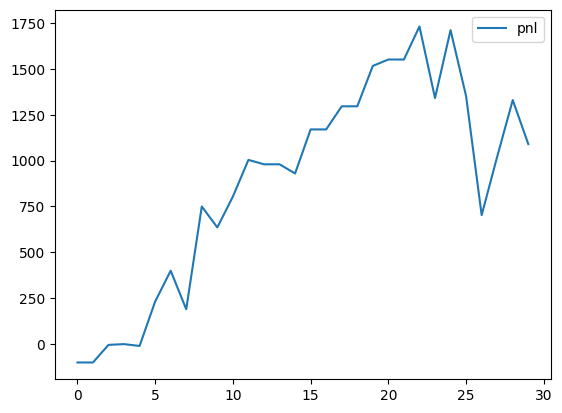

In [ ]:
# for each row in sell_orders, print the price and quantity
total_payed_out = []
for index, row in buy_orders.iterrows():
    if total_payed_out == []:
        total_payed_out.append(row['price'] * row['quantity'])
    else:
        total_payed_out.append(total_payed_out[-1] + row['price'] * row['quantity'])

print(f"Total Payed Out: {total_payed_out}")

total_received = []
if not sell_orders.empty:
    for index, row in sell_orders.iterrows():
        if total_received == []:
            total_received.append(row['price'] * row['quantity'])
        else:
            total_received.append(total_received[-1] + row['price'] * row['quantity'])

print(f"Total Received: {total_received}")

position = []
for index, row in trades_df.iterrows():
    if index == 0:
        position.append(0 + row['quantity']) if row['buyer'] == 'SUBMISSION' else position.append(-row['quantity'])
    else:
        if row['buyer'] == 'SUBMISSION':
            position.append(position[-1] + row['quantity'])
        else:
            position.append(position[-1] - row['quantity'])

print(f"Final Position: {position[-1]}")


position = []
cost_basis = []
pnl = []
for i, row in trades_df.iterrows():
    if cost_basis == []:
        if row['buyer'] == 'SUBMISSION':
            cost_basis.append(-row['price'] * row['quantity'])
            position.append(row['quantity'])
        else:
            cost_basis.append(row['price'] * row['quantity'])
            position.append(-row['quantity'])
    else:
        if row['buyer'] == 'SUBMISSION':
            cost_basis.append(cost_basis[-1] - row['price'] * row['quantity'])
            position.append(position[-1] + row['quantity'])
        else:
            cost_basis.append(cost_basis[-1] + row['price'] * row['quantity'])
            position.append(position[-1] - row['quantity'])
    pnl.append(cost_basis[-1] + position[-1] * row['price'])





    

final_made = total_received[-1] - total_payed_out[-1]
final_pnl = final_made + position[-1] * final_price
print(f"Final PNL: {final_pnl}")
print(f"Position: {position}")

# plot pnl over time
plt.plot(pnl, label='pnl')
# plt.plot(cost_basis, label='cost_basis')
plt.legend()
plt.show()




